## Homework 1

first download the training and validation data - 
you can just download it manually from the link, or use wget:

In [1]:
!wget https://www.dropbox.com/s/xonga1ifrt5ji05/galaxy_train.h5

--2023-05-18 10:25:03--  https://www.dropbox.com/s/xonga1ifrt5ji05/galaxy_train.h5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xonga1ifrt5ji05/galaxy_train.h5 [following]
--2023-05-18 10:25:03--  https://www.dropbox.com/s/raw/xonga1ifrt5ji05/galaxy_train.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20f8e2f905f738727be1339b09.dl-eu.dropboxusercontent.com/cd/0/inline/B8TnrU1ehAxoXOOtftSxNj46ZeTLDG8Iota-StdeY6ANzRHWovG1dYZuWbKmbq6QeX9Y8ApjBLaQvpGlf-6CTO4mFXF7CPHSZIkOUm9-4Ttvt20Kc0abC0j_5E1-lxKEcML4-sM1SqbyneB1ZDaWvtOQr12VfOslCB7dvm9Y8fe45Q/file# [following]
--2023-05-18 10:25:03--  https://uc20f8e2f905f738727be1339b09.dl-eu.dropboxusercontent.com/cd/0/inline/B8TnrU1ehAxoXOOtftSxNj46ZeTLDG8Iota-StdeY6ANzRHWovG1dYZuWbKmbq6Qe

In [2]:
!wget https://www.dropbox.com/s/syca044hglqvd5r/galaxy_val.h5

--2023-05-18 10:25:20--  https://www.dropbox.com/s/syca044hglqvd5r/galaxy_val.h5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/syca044hglqvd5r/galaxy_val.h5 [following]
--2023-05-18 10:25:20--  https://www.dropbox.com/s/raw/syca044hglqvd5r/galaxy_val.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc71a2a305b979c05d1b6ea4d6e7.dl-eu.dropboxusercontent.com/cd/0/inline/B8SLUTNaXz183avuBf7YRhzZDVmqDThhr023k6KnyhI-ynr7dn1ItOHipGXg7i27WesT4f2_OI3x20zkty8bXqlnRoMeUFRGDsts7ZrPUvqY0FB3Ytm9CYtbmFDBLC5I_viXWxEPpaoEgVO-7s2L2pdcWByhSraw9IrBTY8YEJ0cfg/file# [following]
--2023-05-18 10:25:20--  https://uc71a2a305b979c05d1b6ea4d6e7.dl-eu.dropboxusercontent.com/cd/0/inline/B8SLUTNaXz183avuBf7YRhzZDVmqDThhr023k6KnyhI-ynr7dn1ItOHipGXg7i27WesT4f2

in this homework you will build a classifier for the galaxy10 dataset (https://astronn.readthedocs.io/en/latest/galaxy10.html)

but its a "special" version of the dataset created for this homework. The images have been converted to grayscale, downsampled to 64x64, and split into "train" and "val" datasets. There is a seperate test dataset in a secret location, you will train a model, submit it, and we will evaluate it on the test dataset

![image.png](attachment:image.png)

In [3]:
path_to_training_data = 'galaxy_train.h5'
path_to_validation_data = 'galaxy_val.h5'

### activate autoreload so any changes you make to dataloader.py, model.py are automatically imported

In [4]:
%load_ext autoreload
%autoreload 2

## now, write a custom dataloader for the dataset 



In [5]:
from dataset import CustomDataset

## you should get something that works like this:

In [7]:
training_ds = CustomDataset(path_to_training_data,-1)
validation_ds = CustomDataset(path_to_validation_data,-1)

In [8]:
some_random_idx = 12
training_ds[some_random_idx]

(tensor([26.6275, 34.4300, 34.5769,  ..., 38.4556, 30.7125, 38.0475]),
 tensor(9))

## now create the data loaders, and set the batch size. 
remember to shuffle the training dataset

In [9]:
from torch.utils.data import DataLoader

training_dataloader = DataLoader(training_ds,batch_size=300,shuffle=True)
valid_dataloader = DataLoader(validation_ds,batch_size=300)

In [10]:
for x,y in training_dataloader:
    print(x.shape,y.shape)
    break

torch.Size([300, 4096]) torch.Size([300])


In [11]:
len(training_ds)

14187

In [12]:
print(y)

tensor([3, 8, 7, 6, 7, 3, 6, 8, 7, 0, 5, 7, 9, 3, 2, 5, 8, 0, 2, 8, 2, 5, 2, 5,
        5, 2, 2, 7, 3, 1, 6, 7, 7, 2, 7, 5, 2, 1, 7, 1, 5, 8, 6, 6, 2, 7, 7, 3,
        0, 3, 5, 7, 9, 8, 8, 6, 6, 2, 7, 2, 2, 8, 8, 8, 0, 1, 3, 7, 6, 6, 1, 2,
        7, 0, 9, 3, 3, 6, 4, 0, 5, 6, 5, 1, 8, 7, 1, 0, 8, 2, 7, 7, 3, 6, 5, 2,
        5, 2, 0, 7, 9, 8, 7, 2, 9, 6, 2, 7, 5, 2, 3, 3, 8, 6, 8, 6, 9, 2, 6, 2,
        7, 8, 8, 6, 9, 1, 9, 5, 1, 2, 9, 9, 3, 2, 2, 8, 2, 5, 7, 1, 2, 5, 3, 8,
        4, 2, 2, 8, 7, 7, 3, 6, 7, 9, 6, 7, 4, 3, 6, 3, 7, 1, 5, 5, 2, 2, 2, 7,
        8, 8, 8, 7, 5, 2, 5, 6, 7, 1, 3, 6, 9, 0, 6, 3, 7, 9, 2, 0, 7, 9, 2, 3,
        3, 2, 0, 0, 9, 9, 9, 7, 3, 2, 2, 2, 1, 1, 9, 4, 0, 7, 9, 6, 3, 6, 3, 2,
        1, 2, 7, 5, 9, 7, 0, 6, 5, 8, 9, 7, 1, 7, 8, 2, 1, 3, 6, 9, 6, 9, 2, 3,
        5, 3, 2, 8, 8, 6, 1, 1, 1, 6, 6, 9, 6, 8, 1, 7, 9, 9, 2, 7, 9, 2, 1, 1,
        6, 2, 0, 4, 1, 9, 0, 1, 0, 6, 8, 7, 5, 0, 2, 6, 0, 3, 1, 6, 7, 5, 2, 5,
        2, 6, 7, 0, 3, 7, 8, 6, 2, 6, 9,

## lets plot some examples from each class

this should work if your dataloader is implemented properly

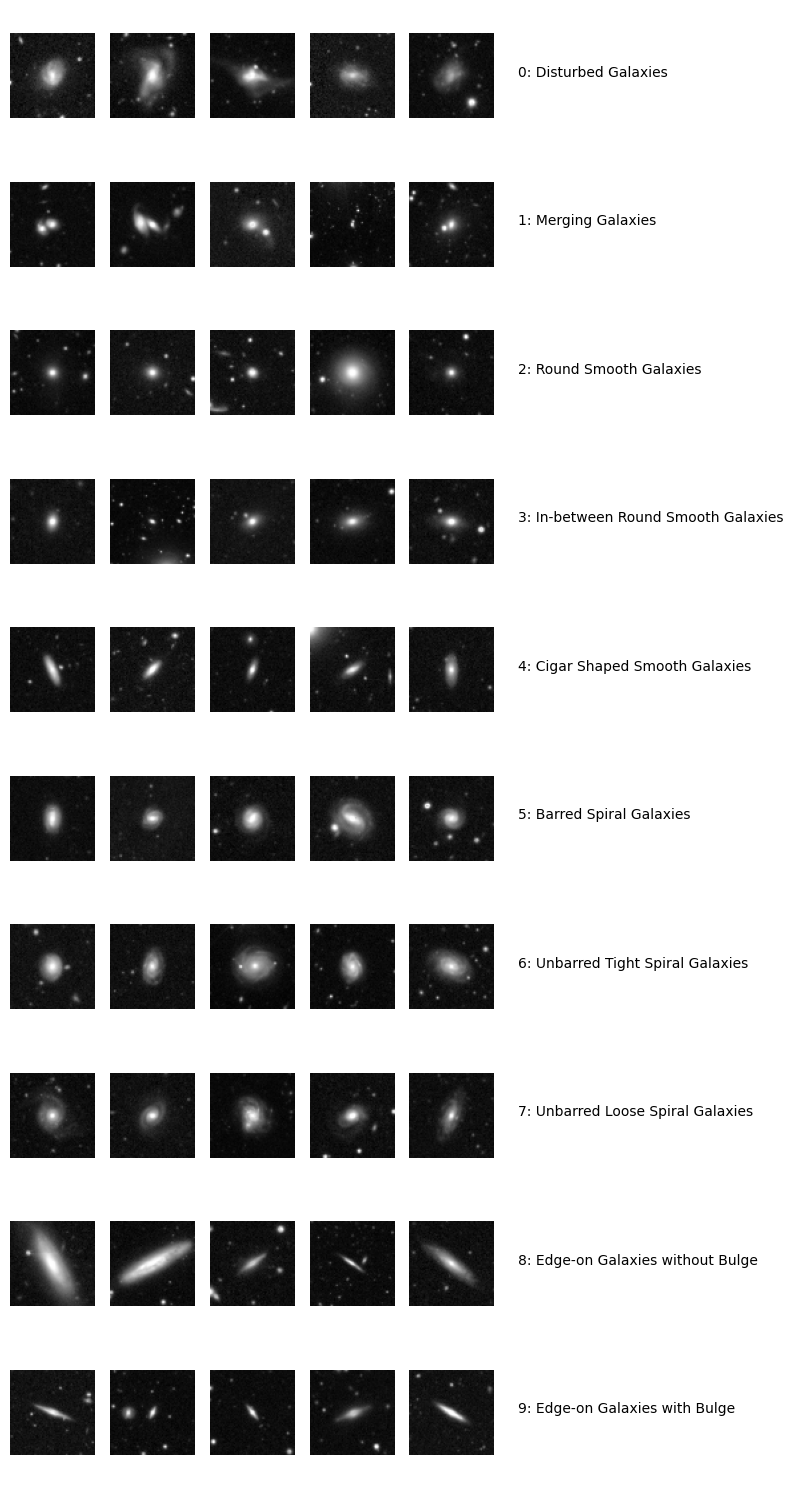

In [13]:
import numpy as np
import matplotlib.pyplot as plt

labels = [
    'Disturbed Galaxies',
    'Merging Galaxies',
    'Round Smooth Galaxies',
    'In-between Round Smooth Galaxies',
    'Cigar Shaped Smooth Galaxies',
    'Barred Spiral Galaxies',
    'Unbarred Tight Spiral Galaxies',
    'Unbarred Loose Spiral Galaxies',
    'Edge-on Galaxies without Bulge',
    'Edge-on Galaxies with Bulge'
    ]

fig,ax = plt.subplots(10,6,figsize=(8,15))


for class_i in range(10):
    idxs = np.where( training_ds.labels == class_i )[0]
    idxs = np.random.permutation(idxs)
    for plot_i in range(np.min([5,len(idxs)])):

        ax[class_i][plot_i].imshow(training_ds[idxs[plot_i]][0].reshape(64,64),cmap='gray')
        ax[class_i][plot_i].set_axis_off()

    #Draw the label
    ax[class_i][5].text(0.1,0.5,f'{class_i}: {labels[class_i]}')
    ax[class_i][5].set_axis_off()
        
plt.tight_layout()
plt.show()

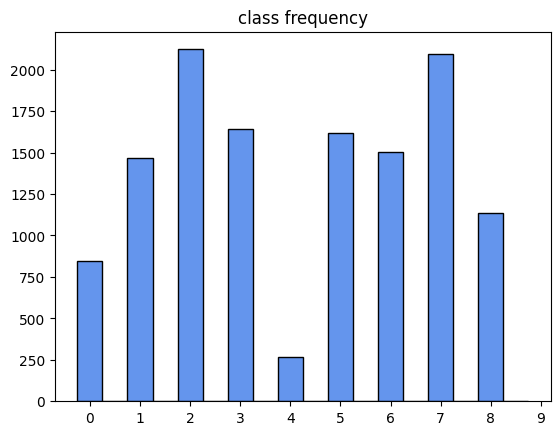

In [14]:
plt.hist(training_ds.labels.data.numpy(),bins=np.linspace(0,9,19)-0.25,color='cornflowerblue',ec='k')
plt.xticks(np.arange(10))
plt.title('class frequency')
plt.show()

# Now lets build the neural network

its a classifier - it takes as input 64*64 numbers, and outputs 10 numbers

In [15]:
from model import Net

In [16]:
net = Net()

## check your model takes the input and returns the right shape for the output.
should be (Batch size, 10) for the 10 classes

In [ ]:
for x,y in training_dataloader:
    print(x.shape,net(x).shape,y.shape)
    break

torch.Size([300, 4096]) torch.Size([300, 10]) torch.Size([300])


## the training:


The network will be trained to predict a high value for output nodes that correspond to probable classes for the given example. The correct answer is, of course, only a single class. To compare the predicted values for each class and the correct class, we use a very popular loss function called CrossEntropy. It first transforms the network prediction into a set of probabilities for each class and then calculates a distance between predicted and target distributions using logarithmic values of the probabilities for each class.

To learn more check out these descriptions:
- https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) 

In [ ]:
def compute_accuracy_and_loss(dataloader,net):
    total = 0
    correct = 0
    
    loss = 0
    
    if torch.cuda.is_available():
        net.cuda()
    net.eval()
    
    n_batches = 0
    with torch.no_grad():
        for x,y in dataloader:
            n_batches+=1
            
            if torch.cuda.is_available():
                x = x.cuda()
                y = y.cuda()
            pred = net(x)

            print(pred[0])
            
            loss+= loss_func(pred,y).item()
            
            pred = torch.argmax(pred,dim=1)

            correct+=len(torch.where(pred==y)[0])
            total+=len(y)

    loss = loss/n_batches      
    return correct/total, loss

In [ ]:
compute_accuracy_and_loss(training_dataloader,net)

(0.05723549728624797, 2.5564908434947333)

In [ ]:
compute_accuracy_and_loss(valid_dataloader,net)

tensor([ 4.4780, -0.6646,  2.3061, -4.7040, -7.2963,  4.0055,  2.9681,  6.3272,
        -4.9618, -0.5270])


(0.6866666666666666, 0.8473165035247803)

### A basic training loop

In [ ]:
if torch.cuda.is_available():
    net.cuda()

In [ ]:
from tqdm.notebook import tqdm

n_epochs = 80


training_loss_vs_epoch = []
validation_loss_vs_epoch = []

training_acc_vs_epoch = []
validation_acc_vs_epoch = []

pbar = tqdm( range(n_epochs) )

for epoch in pbar:
    
    if len(validation_loss_vs_epoch) > 1:
        pbar.set_description('val acc:'+'{0:.5f}'.format(validation_acc_vs_epoch[-1])+
                             ', train acc:'+'{0:.5f}'.format(training_acc_vs_epoch[-1]))
    
    net.train() # put the net into "training mode"
    for x,y in training_dataloader:
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()

        optimizer.zero_grad()
        pred = net(x)
        loss = loss_func(pred,y)
        loss.backward()
        optimizer.step()
    
    net.eval() #put the net into evaluation mode
    
    #evaluate accuracy and loss after this step and save for later
    train_acc, train_loss = compute_accuracy_and_loss(training_dataloader,net)
    valid_acc, valid_loss =  compute_accuracy_and_loss(valid_dataloader,net)
         
    training_loss_vs_epoch.append( train_loss)    
    training_acc_vs_epoch.append( train_acc )
    validation_loss_vs_epoch.append(valid_loss)
    validation_acc_vs_epoch.append(valid_acc)
    
    #save the model if the validation loss has decreased
    if len(validation_loss_vs_epoch)==1 or validation_loss_vs_epoch[-1] < validation_loss_vs_epoch[-2]:
        torch.save(net.state_dict(), 'trained_model.pt')
    
    
    

  0%|          | 0/80 [00:00<?, ?it/s]

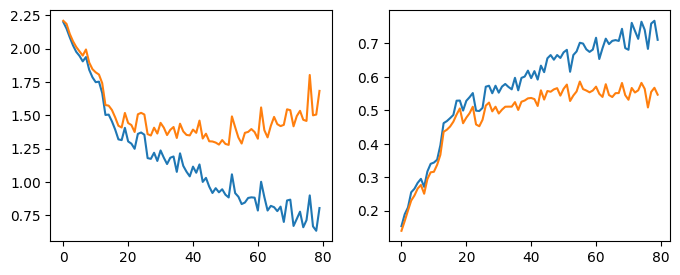

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(training_loss_vs_epoch,label='training')
ax[0].plot(validation_loss_vs_epoch,label='validation')

ax[1].plot(training_acc_vs_epoch)
ax[1].plot(validation_acc_vs_epoch)

plt.show()